In [1]:
import random
import copy
import pickle
import pandas as pd


In [2]:
def roll_dice(type_dice, how_many):
    total = 0
    total += random.randint(1,type_dice)
    return total

In [3]:
class Titan:
    def __init__(self, name, ac, strength, init, hp, attacks, damage):
        self.name = name
        self.ac = ac
        self.strength = strength
        self.init = init
        self.total_hp = hp
        self.hp = hp
        self.attacks = attacks
        self.damage = damage
        self.dead = False
        self.missed = 0
    
    def attack(self, titan):
        for i in range(self.attacks):
            total_attack = roll_dice(20, 1) + self.strength
            if total_attack > titan.ac:
                total_damage = roll_dice(self.damage, 1) + self.strength
                print(self.name, 'deals', total_damage, 'damage to', titan.name)
                titan.lose_hp(total_damage)
            else:
                print(self.name, 'misses attack')
                self.missed += 1
    
    def lose_hp(self, wound):
        self.hp -= wound
        if self.hp<=0:
            self.die()
    
    def die(self):
        self.dead = True
        

In [18]:
class AttackTitan(Titan):
    def __init__(self):
        self.name = 'Attack Titan'
        self.ac = 15
        self.strength = 5
        self.init = 2
        self.total_hp = 50
        self.hp = 50
        self.attacks = 3
        self.damage = 12
        self.dead = False
        self.missed = 0

class ArmouredTitan(Titan):
    def __init__(self):
        self.name = 'Armoured Titan'
        self.ac = 17
        self.strength = 4
        self.init = 1
        self.total_hp = 60
        self.hp = 60
        self.attacks = 1
        self.damage = 10
        self.dead = False
        self.missed = 0 
        
class ColossalTitan(Titan):
    def __init__(self):
        self.name = 'Colossal Titan'
        self.ac = 10
        self.strength = 6
        self.init = 0
        self.total_hp = 80
        self.hp = 100
        self.attacks = 1
        self.damage = 12
        self.dead = False
        self.missed = 0 

class BeastTitan(Titan):
    def __init__(self):
        self.name = 'Beast Titan'
        self.ac = 13
        self.strength = 2
        self.init = 1
        self.total_hp = 40
        self.hp = 40
        self.attacks = 1
        self.damage = 10
        self.dead = False
        self.missed = 0 
        

class WarhammerTitan(Titan):
    def __init__(self):
        self.name = 'Warhammer Titan'
        self.ac = 15
        self.strength = 5
        self.init = 2
        self.total_hp = 50
        self.hp = 50
        self.attacks = 2
        self.damage = 12
        self.dead = False
        self.missed = 0
    
    def attack(self, titan):
        for i in range(self.attacks):
            total_attack = roll_dice(20, 1) + self.strength - 3
            if total_attack > titan.ac:
                total_damage = roll_dice(self.damage, 1) + self.strength + 10
                print(self.name, 'deals', total_damage, 'damage to', titan.name)
                titan.lose_hp(total_damage)
            else:
                print(self.name, 'misses attack')
                self.missed += 1
                
class FemaleTitan(Titan):
    def __init__(self):
        self.name = 'Female Titan'
        self.ac = 15
        self.strength = 4
        self.init = 3
        self.total_hp = 40
        self.hp = 40
        self.attacks = 2
        self.damage = 12
        self.dead = False
        self.missed = 0 
        
class CartTitan(Titan):
    def __init__(self):
        self.name = 'Cart Titan'
        self.ac = 13
        self.strength = 3
        self.init = 1
        self.total_hp = 40
        self.hp = 40
        self.attacks = 1
        self.damage = 12
        self.dead = False
        self.missed = 0 

class JawTitan(Titan):
    def __init__(self):
        self.name = 'Jaw Titan'
        self.ac = 15
        self.strength = 4
        self.init = 4
        self.total_hp = 45
        self.hp = 45
        self.attacks = 2
        self.damage = [20, 10]
        self.dead = False
        self.missed = 0
        
    def attack(self, titan):
        for i in range(self.attacks):
            total_attack = roll_dice(20, 1) + self.strength
            if total_attack > titan.ac:
                total_damage = roll_dice(self.damage[i], 1) + self.strength
                print(self.name, 'deals', total_damage, 'damage to', titan.name)
                titan.lose_hp(total_damage)
            else:
                print(self.name, 'misses attack')
                self.missed += 1

In [19]:
def initiative_phase(titan_1, titan_2):
    attack_order = []
    init_score_1 = roll_dice(20,1) + titan_1.init
    init_score_2 = roll_dice(20,1) + titan_2.init
    if init_score_1 > init_score_2:
        attack_order = [1,2]
    elif init_score_1 < init_score_2:
        attack_order = [2,1]
    else:
        draw = roll_dice(100,1)
        if draw >= 50:
            attack_order = [1,2]
        else:
            attack_order = [2,1]
    return attack_order


def combat_phase(titan_1, titan_2, attack_order):
    titans_dict = {1:titan_1, 2:titan_2}
    for i in attack_order:
        attacker = titans_dict[i]
        defender = titans_dict[[x for x in attack_order if x != i][0]]
        if not attacker.dead and not defender.dead:
            attacker.attack(defender)
        elif attacker.dead:
            print(attacker.name, 'cannot attack because he is dead')
        elif defender.dead:
            print(defender.name, 'cannot be attacked because he is dead')
            
def duel(titan_1, titan_2):
    attack_order = initiative_phase(titan_1, titan_2)
    print(attack_order)
    print('\n')
    turn_count = 0
    result = {}
    while not titan_1.dead and not titan_2.dead:
        combat_phase(titan_1, titan_2, attack_order)
        turn_count +=1
        print('\n')
    if titan_1.dead:
        print('The winner is', titan_2.name)
        result = {'winner':titan_2, 'loser':titan_1, 'turns':turn_count}
    elif titan_2.dead:
        print('The winner is', titan_1.name)
        result = {'winner':titan_1, 'loser':titan_2, 'turns':turn_count}
    return result
    

In [62]:
titan_1_list = []
titan_2_list = []
total_damage_1_list = []
total_damage_2_list = []
missed_1_list = []
missed_2_list = []
winner_list = []
turns_list = []


for i in range (10000):
    titan_1 = JawTitan()
    titan_2 = CartTitan()

    result = duel(titan_1, titan_2)

    titan_1_list.append(titan_1.name)
    titan_2_list.append(titan_2.name)
    if titan_2.hp<0:
        titan_2.hp = 0
    total_damage_1_list.append(titan_2.total_hp - titan_2.hp)
    if titan_1.hp <0:
        titan_1.hp = 0
    total_damage_2_list.append(titan_1.total_hp - titan_1.hp)
    missed_1_list.append(titan_1.missed)
    missed_2_list.append(titan_2.missed)
    winner_list.append(result['winner'].name)
    turns_list.append(result['turns'])


d = {
    
    'titan_1':titan_1_list,
    'titan_2':titan_2_list,
    'total_damage_1':total_damage_1_list,
    'total_damage_2':total_damage_2_list,
    'missed_1':missed_1_list,
    'missed_2':missed_2_list,
    'winner':winner_list,
    'turns':turns_list
}

raw_results = pd.DataFrame(data=d)


[1, 2]


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 8 damage to Cart T

The winner is Jaw Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan dea

Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan cannot attack because he is dead


The winner is Cart Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses

Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 1

Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw 

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The wi

Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


Cart



The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he

Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 11 dama

Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan mis

Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1

Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan mi

Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Tita

Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses 

Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 8 damage to 

Cart Titan misses attack
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[

Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan misses at

Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses a

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Tita

Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misse

Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Tit

Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan 

Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack


The wi

Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 7

Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Ti

Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan mis

Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Tit

Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because h

Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack becau

Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan mi

Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan c


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Ja

Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 damage to Car

[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Ja

Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Tit



Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
J

[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Ti

Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Tit

Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Tita

Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 13 damage to J

Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw T

Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack

Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Tit



Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 15 dam

Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Ca

Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Tita

Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1,

Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart 



Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan de

Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Tit

Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan ca

[1, 2]


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


The winner is Cart Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Tita

Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage

Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he i

Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan d

Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan 

[1, 2]


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Tita

The winner is Jaw Titan
[2, 1]


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses atta

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan d

Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart T

Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misse

Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Ti

Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses atta

Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan

Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attac

Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 13 damage to Jaw 



Cart Titan misses attack
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses att

Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 10 damage to Jaw

Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 15 damage to 

Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack



Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attac

Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


Cart Tit

Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Ja

The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan



Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan 


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


The winner is Cart Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan

Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The w

Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan mis

Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Tita

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 10 damage to Cart

Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 17 da

Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 5 damage to C

Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan m

Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart 

Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 12 damage to Cart T

Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to

Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan

Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan m

Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 da

Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Ti

Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart 

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deal

Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Car

Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Tit

Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 dama



Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart 

Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 7 dam


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 1

Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart T

Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 5 damage to Car

Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack becau

Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 

Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


Car

Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 9 damage to Cart Titan

Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 13 damage to Jaw Titan
Jaw T

[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan dea

Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan mis

Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to

Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage 

Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan

Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack

Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
J

Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart T

Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan




Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 7 damage to Jaw Tit

Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 5 damage to Cart Titan




Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart T

Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw

Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 

Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw T

Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is J

Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart T

Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 5 damage

Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Tita

Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


C

Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan

Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead




Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 13 damage 

Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 10 damage to Jaw Ti

Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage 

Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


The winner is Cart Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because

Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 13 dam

Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winn

Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan mi

Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan

Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 14 d

Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart T

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw T

Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 13 damage to

Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart T

Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attac

Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack



Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 24 damage to Cart Titan
Jaw

Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deal

Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to

Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan miss

Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 15 d

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[

Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Ti

Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Tita

Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan deals 18 damag

Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Ti

Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan



Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 15 damage to Car

Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 7 damage 

The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misse

Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 8 damage to C

Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deal



Cart Titan deals 7 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because

[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Tit

The winner is Jaw Titan
[2, 1]


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is

Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The 

Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan 

Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan deals 9 damage to Jaw Titan




The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 13 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack b

Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 8 damage to Car

Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 15 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan miss

Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 16 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart

Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attac

Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw T

Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 15 damage to Jaw Titan


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan 

Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan mis

Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 10 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses a

Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead

Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Tita

Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 16 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses at



The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deal

Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Ja

Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 7 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 4 damage to Jaw Titan
Jaw Titan deals 11 d



Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 18 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Tita

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 7 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 9 damage to Cart Titan


Cart Titan deals 11 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw

Cart Titan misses attack


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 9 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 22 damage t

Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan


Cart Titan dea

Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 6 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 22 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 12 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 5 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Tita

Jaw Titan deals 13 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 7 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 7 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 11 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 9 damage t

Jaw Titan deals 7 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 9 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan


Jaw Titan deals 10 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 8 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 13 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 22 damage

Cart Titan deals 11 damage to Jaw Titan
Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 11 damage to Cart Titan


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 13 damage to Jaw Titan


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan


Cart Titan misses attack
Jaw Titan deals 22 damage

Jaw Titan deals 10 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 6 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 14 damage to Jaw Titan
Jaw Titan deals 14 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan


Cart Titan deals 8 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan misses attack


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 11 damage to Cart Titan
Jaw Titan deals 7 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 11 damage to Car

Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan deals 20 damage to Cart Titan
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 10 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan deals 13 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 12 damage to Jaw Titan
Jaw Titan deals 21 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan




Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan deals 6 damage to Cart Titan


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 24 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan


Cart Titan misses attack
Jaw Titan misses attack
Jaw Titan misses attack


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan deals 17 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan
Cart Titan deals 7 damage to Jaw Titan


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan misses attack
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan misses attack
Cart Titan deals 4 damage to Jaw Titan


Jaw Titan deals 9 damage to Cart Titan
Jaw Titan misses attack
Cart Titan deals 11 damage to Jaw Titan


Jaw Titan deals 19 damage to Cart Titan
Jaw Titan deals 12 damage to Cart Titan
Cart Titan cannot attack because he is dead

Jaw Titan deals 5 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 5 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 8 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 12 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan deals 10 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan


Cart Titan deals 5 damage to Jaw Titan
Jaw Titan misses attack
Jaw Titan deals 8 damage to Cart Titan


Cart Titan misses 

Cart Titan misses attack


Jaw Titan deals 23 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan deals 6 damage to Cart Titan
Jaw Titan deals 9 damage to Cart Titan
Cart Titan misses attack


Jaw Titan misses attack
Jaw Titan deals 13 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 10 damage to Cart Titan
Cart Titan misses attack


Jaw Titan deals 15 damage to Cart Titan
Jaw Titan deals 5 damage to Cart Titan
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[1, 2]


Jaw Titan misses attack
Jaw Titan deals 14 damage to Cart Titan
Cart Titan deals 14 damage to Jaw Titan


Jaw Titan misses attack
Jaw Titan deals 12 damage to Cart Titan
Cart Titan deals 5 damage to Jaw Titan


Jaw Titan deals 18 damage to Cart Titan
Jaw Titan misses attack
Cart Titan cannot attack because he is dead


The winner is Jaw Titan
[2, 1]


Cart Titan misse

In [63]:
raw_results.head()

titan_1     titan_2  total_damage_1  total_damage_2  missed_1  missed_2  \
0  Jaw Titan  Cart Titan              40               0         2         2   
1  Jaw Titan  Cart Titan              40              10         3         2   
2  Jaw Titan  Cart Titan              40              13         1         1   
3  Jaw Titan  Cart Titan              40              15         3         1   
4  Jaw Titan  Cart Titan              40               9         2         2   

      winner  turns  
0  Jaw Titan      3  
1  Jaw Titan      4  
2  Jaw Titan      2  
3  Jaw Titan      3  
4  Jaw Titan      3

<AxesSubplot:>

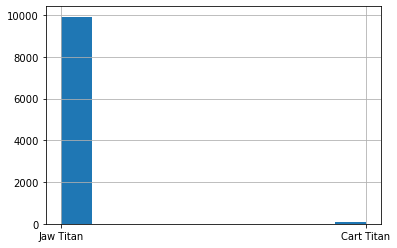

In [64]:
raw_results['winner'].hist()

In [65]:
# Aggregate stats

duel_mean_damage_1 = raw_results['total_damage_1'].mean()
duel_mean_damage_2 = raw_results['total_damage_2'].mean()

win_ratio_1 = (len(raw_results.loc[raw_results['winner'] == titan_1.name]) * 100)/len(raw_results)
win_ratio_2 = (len(raw_results.loc[raw_results['winner'] == titan_2.name]) * 100)/len(raw_results)

turns_sum = raw_results['turns'].sum()

total_attacks_1 = titan_1.attacks*turns_sum
total_hits_1 = total_attacks_1 - raw_results['missed_1'].sum()
hit_ratio_1 = (total_hits_1*100)/total_attacks_1

total_attacks_2 = titan_2.attacks*turns_sum
total_hits_2 = total_attacks_2 - raw_results['missed_2'].sum()
hit_ratio_2 = (total_hits_2*100)/total_attacks_2

mean_turns_to_win_1 = (raw_results.loc[raw_results['winner'] == titan_1.name])['turns'].mean()
mean_turns_to_win_2 = (raw_results.loc[raw_results['winner'] == titan_2.name])['turns'].mean()

d = {
    
    'win_ratio':[win_ratio_1, win_ratio_2],
    'duel_mean_damage':[duel_mean_damage_1, duel_mean_damage_2],
    'hit_ratio':[hit_ratio_1, hit_ratio_2],
    'mean_turns_to_win':[mean_turns_to_win_1, mean_turns_to_win_2]
}

stats = pd.DataFrame(data=d, index=[titan_1.name, titan_2.name])


In [66]:
stats

win_ratio  duel_mean_damage  hit_ratio  mean_turns_to_win
Jaw Titan       99.26           39.9141  55.083001           3.725871
Cart Titan       0.74           11.6193  50.033414           5.756757

In [67]:
raw_results.to_pickle("data/raw/jaw_cart_10000_v1.pkl")
stats.to_pickle("data/stats/jaw_cart_v1.pkl")